## RNN(순환신경망, recurrent neural network)
+ 순서가 있는 데이터를 입력으로 받아, 변화하는 입력에 대한 출력을 얻음
+ 시계열(날씨, 주가 등), 자연어 같이 시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터 사용
+ FFN(feed forward network)와 달리, 이전 층의 출력이 다시 입력으로 연결되는 신경망 구조(현재 상태가 이전 상태에 종속)


### 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">  

<sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN
- one to many
  - Image Captioning 
  - 이미지에 대한 설명 생성
- many to one
  - Sentiment Classification
  - 문장의 긍정/부정을 판단하는 감정 분석
- many to many
  - Machine Translation
  - 하나의 언어를 다른 언어로 번역하는 기계 번역
- many to many
  - Video Classification(Frame Level)

### 순환 신경망 레이어 (RNN Layer)
- 입력: `(timesteps, input_features)`
- 출력: `(timesteps, output_features)`

### keras의 순환층
- `SimpleRNN` layer
- 입력: `(batch_size, timesteps, input_features)`
- 출력
  - `return_sequences`로 결정할 수 있음
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환
    - `(batch_size, timesteps, output_features)`
  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환
    - `(batch_size, output_features)`

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

num_words = 10000   
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
np.load = np_load_old

x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.

((25000,), (25000,), (25000,), (25000,))

In [2]:
max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

padded_x_train.shape, padded_x_test.shape

((25000, 500), (25000, 500))

In [3]:
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    SimpleRNN(units=32),  
                    Dense(1, activation='sigmoid')])  #긍정/부정 이진분류
    
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf

with tf.device("/device:GPU:0"):
    history = model.fit(padded_x_train, y_train, 
                        epochs=10, batch_size=32,
                        validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.5671 - acc: 0.6841 - val_loss: 0.3968 - val_acc: 0.8264
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.3534 - acc: 0.8529 - val_loss: 0.3706 - val_acc: 0.8376
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.2891 - acc: 0.8852 - val_loss: 0.3657 - val_acc: 0.8494
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.3335 - acc: 0.8598 - val_loss: 0.4665 - val_acc: 0.7696
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.2930 - acc: 0.8841 - val_loss: 0.4114 - val_acc: 0.8328
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.1998 - acc: 0.9255 - val_loss: 0.4618 - val_acc: 0.8412
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/sam

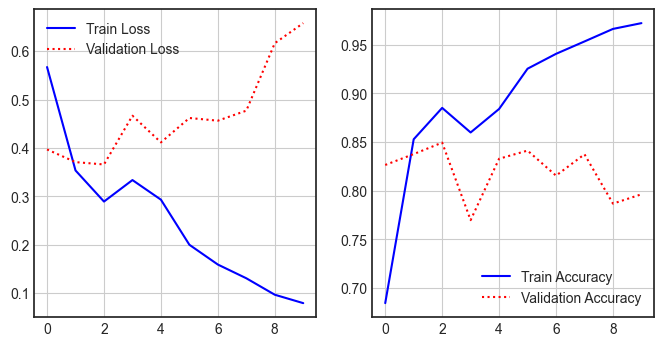

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [6]:
model.evaluate(padded_x_test, y_test)

25000/25000 [==============================] - 12s 462us/sample - loss: 0.6428 - acc: 0.7971


[0.6428288578224182, 0.79712]

+ 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴
+ SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음
+ SimpleRNN은 실전에 사용하기엔 너무 단순
+ SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음
+ 기울기 소실 문제(vanishing gradient problem)  
  => 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장

## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

In [7]:
from tensorflow.keras.layers import LSTM

model = Sequential([Embedding(num_words, 32),
                    LSTM(32),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
with tf.device("/device:GPU:0"):
    history = model.fit(padded_x_train, y_train, 
                        epochs=10, batch_size=32,
                        validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 107s 5ms/sample - loss: 0.2716 - acc: 0.8967 - val_loss: 0.2815 - val_acc: 0.8812
Epoch 2/10
20000/20000 [==============================] - 106s 5ms/sample - loss: 0.2223 - acc: 0.9178 - val_loss: 0.3160 - val_acc: 0.8708
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/sample - loss: 0.2005 - acc: 0.9258 - val_loss: 0.3314 - val_acc: 0.8830
Epoch 4/10
20000/20000 [==============================] - 139s 7ms/sample - loss: 0.1823 - acc: 0.9340 - val_loss: 0.2766 - val_acc: 0.8860
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/sample - loss: 0.1662 - acc: 0.9398 - val_loss: 0.3213 - val_acc: 0.8824
Epoch 6/10
20000/20000 [==============================] - 117s 6ms/sample - loss: 0.1582 - acc: 0.9435 - val_loss: 0.2846 - val_acc: 0.8906
Epoch 7/10
20000/20000 [==============================] - 106s 5ms/sample - loss: 0.1474 - acc: 0.9498 - val_lo

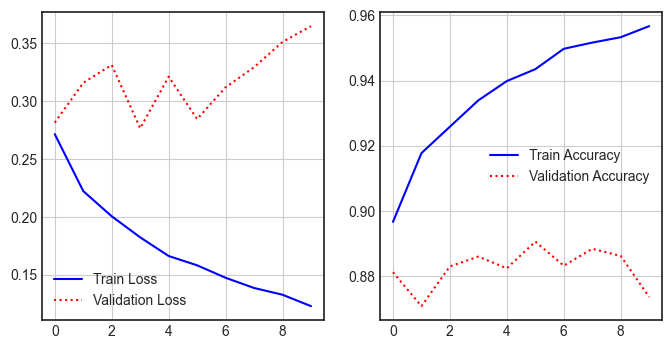

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [11]:
model.evaluate(padded_x_test, y_test)

25000/25000 [==============================] - 30s 1ms/sample - loss: 0.4408 - acc: 0.8499


[0.44080650957584383, 0.84992]

## GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>


In [13]:
from tensorflow.keras.datasets import reuters
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

num_words = 10000   
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)
np.load = np_load_old

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

max_len = 500
padded_x_train = pad_sequences(x_train, maxlen=max_len)
padded_x_test = pad_sequences(x_test, maxlen=max_len)

print(padded_x_train.shape, padded_x_test.shape)

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


(8982,) (8982,) (2246,) (2246,)
(8982, 500) (2246, 500)


In [14]:
from tensorflow.keras.layers import GRU

model = Sequential([Embedding(num_words, 256),
                    GRU(256, return_sequences=True),
                    GRU(128),
                    Dense(46, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         393984    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               147840    
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total params: 3,107,758
Trainable params: 3,107,758
Non-trainable params: 0
_________________________________________________________________


In [16]:
with tf.device("/device:GPU:0"):
    history = model.fit(padded_x_train, y_train, 
                        epochs=10, batch_size=32,
                        validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 683s 85ms/sample - loss: 2.0186 - acc: 0.4700 - val_loss: 1.8536 - val_acc: 0.5606
Epoch 2/10
8083/8083 [==============================] - 703s 87ms/sample - loss: 1.6715 - acc: 0.5765 - val_loss: 1.6345 - val_acc: 0.6118
Epoch 3/10
8083/8083 [==============================] - 690s 85ms/sample - loss: 1.3908 - acc: 0.6478 - val_loss: 1.3936 - val_acc: 0.6585
Epoch 4/10
8083/8083 [==============================] - 659s 82ms/sample - loss: 1.1362 - acc: 0.7082 - val_loss: 1.2221 - val_acc: 0.7030
Epoch 5/10
8083/8083 [==============================] - 651s 81ms/sample - loss: 0.8627 - acc: 0.7793 - val_loss: 1.1123 - val_acc: 0.7386
Epoch 6/10
8083/8083 [==============================] - 657s 81ms/sample - loss: 0.6669 - acc: 0.8319 - val_loss: 1.0746 - val_acc: 0.7408
Epoch 7/10
8083/8083 [==============================] - 647s 80ms/sample - loss: 0.5201 - acc: 0.8703 - val_loss: 1.064

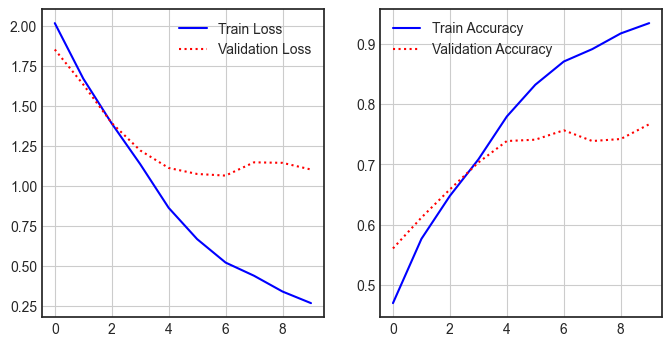

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [18]:
model.evaluate(padded_x_test, y_test)

2246/2246 [==============================] - 28s 12ms/sample - loss: 1.0832 - acc: 0.7787


[1.0832282425777677, 0.7787177]